In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC
from sklearn.metrics import balanced_accuracy_score, accuracy_score, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
import pipeline_utilities_v2 as p_utils


NameError: name 'df' is not defined

In [2]:
# Load dataframe
df = pd.read_csv('https://archive.ics.uci.edu/static/public/329/data.csv')
df.head()

,quality,pre_screening,ma1,ma2,ma3,ma4,ma5,ma6,exudate1,exudate2,exudate3,exudate3.1,exudate5,exudate6,exudate7,exudate8,macula_opticdisc_distance,opticdisc_diameter,am_fm_classification,Class
0,1,1,22,22,22,19,18,14,49.895756,17.775994,5.270920,0.771761,0.018632,0.006864,0.003923,0.003923,0.486903,0.100025,1,0
1,1,1,24,24,22,18,16,13,57.709936,23.799994,3.325423,0.234185,0.003903,0.003903,0.003903,0.003903,0.520908,0.144414,0,0
2,1,1,62,60,59,54,47,33,55.831441,27.993933,12.687485,4.852282,1.393889,0.373252,0.041817,0.007744,0.530904,0.128548,0,1
3,1,1,55,53,53,50,43,31,40.467228,18.445954,9.118901,3.079428,0.840261,0.272434,0.007653,0.001531,0.483284,0.114790,0,0
4,1,1,44,44,44,41,39,27,18.026254,8.570709,0.410381,0.000000,0.000000,0.000000,0.000000,0.000000,0.475935,0.123572,0,1


In [3]:
# Explore dataframe for number of row and columns, any null values and datatypes. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1151 entries, 0 to 1150
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   quality                    1151 non-null   int64  
 1   pre_screening              1151 non-null   int64  
 2   ma1                        1151 non-null   int64  
 3   ma2                        1151 non-null   int64  
 4   ma3                        1151 non-null   int64  
 5   ma4                        1151 non-null   int64  
 6   ma5                        1151 non-null   int64  
 7   ma6                        1151 non-null   int64  
 8   exudate1                   1151 non-null   float64
 9   exudate2                   1151 non-null   float64
 10  exudate3                   1151 non-null   float64
 11  exudate3.1                 1151 non-null   float64
 12  exudate5                   1151 non-null   float64
 13  exudate6                   1151 non-null   float

In [4]:
# Determine if the target is balanced or imbalanced.
df['Class'].value_counts()

Class
1    611
0    540
Name: count, dtype: int64

The target column "Class" is balanced. 

In [5]:
# Additional Columns to get value counts for
columns_to_count = ['quality', 'pre_screening', 'am_fm_classification']

# Iterating through each specified column and printing value counts
for column in columns_to_count:
    print(f"Value counts for {column}:")
    print(df[column].value_counts())
    print() 

Value counts for quality:
quality
1    1147
0       4
Name: count, dtype: int64

Value counts for pre_screening:
pre_screening
1    1057
0      94
Name: count, dtype: int64

Value counts for am_fm_classification:
am_fm_classification
0    764
1    387
Name: count, dtype: int64



The dataset contains largely high quality images, most with severe retinal abnormality. 

In [6]:
# Create X & Y variables 
df = df.rename(columns={'Class': 'y'})
X = df.drop('y', axis=1)
y = df['y']

In [7]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)
X_train.describe()

,quality,pre_screening,ma1,ma2,ma3,ma4,ma5,ma6,exudate1,exudate2,exudate3,exudate3.1,exudate5,exudate6,exudate7,exudate8,macula_opticdisc_distance,opticdisc_diameter,am_fm_classification
count,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000
mean,0.996739,0.915217,38.221739,36.752174,35.034783,32.216304,28.698913,21.053261,63.244013,22.567026,8.529531,1.800588,0.542897,0.203199,0.080350,0.033318,0.523609,0.108714,0.327174
std,0.057042,0.278709,25.644017,24.120064,22.868857,21.230174,19.596351,15.056094,59.130185,21.899020,11.833751,3.928454,2.437831,0.993932,0.347848,0.145953,0.027919,0.018382,0.469437
min,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.349274,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.367762,0.057906,0.000000
25%,1.000000,1.000000,16.000000,15.750000,15.000000,13.000000,11.000000,8.000000,21.297663,7.667363,1.200086,0.076459,0.000000,0.000000,0.000000,0.000000,0.503333,0.095990,0.000000
50%,1.000000,1.000000,36.000000,35.000000,32.000000,29.000000,25.000000,18.000000,43.469673,16.409107,4.299345,0.468301,0.020348,0.001041,0.000000,0.000000,0.523315,0.106640,0.000000
75%,1.000000,1.000000,55.000000,53.000000,51.000000,48.000000,43.000000,32.000000,82.682002,30.002288,11.244207,1.893094,0.191907,0.036203,0.004815,0.003821,0.544085,0.120162,1.000000
max,1.000000,1.000000,151.000000,132.000000,120.000000,105.000000,97.000000,89.000000,403.939108,167.131427,106.070092,59.766121,51.423208,20.098605,3.739609,1.922177,0.592217,0.219199,1.000000


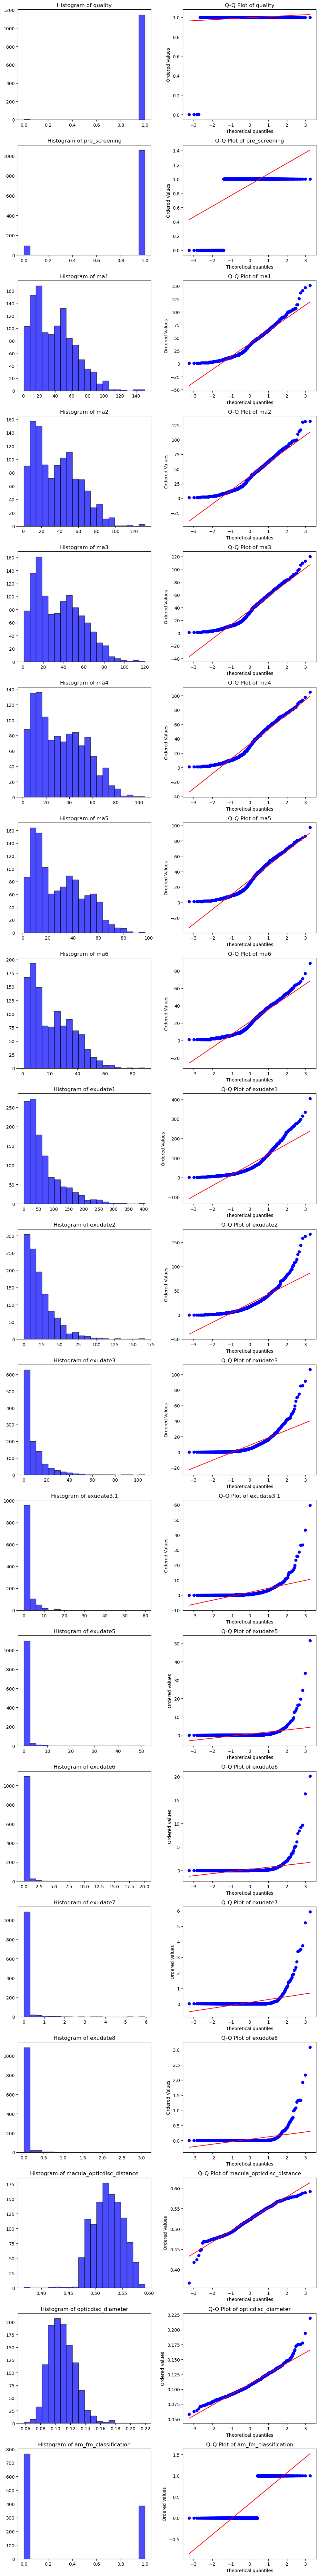

In [8]:
# Check if each feature follow a normal distrbution. If so, use StandardScalar (PCA Linear and Logistic Regression and Support Vector Models)
# Histograms to see the distribution shapes.
# Q-Q Plots to compare the distribution of the features against a theoretically normal distribution. 
# The points should fall approximately along the reference line if the distribution is normal. Deviations from the line suggest the data may not be normally distributed.

# Function to plot histograms and Q-Q plots for each feature
def plot_distributions(X):
    fig, axs = plt.subplots(len(X.columns), 2, figsize=(10, 4 * len(df.columns)))
    
    for i, column in enumerate(X.columns):
        # Histogram
        axs[i, 0].hist(X[column], bins=20, alpha=0.7, color='blue', edgecolor='black')
        axs[i, 0].set_title(f'Histogram of {column}')
        
        # Q-Q plot
        stats.probplot(X[column], dist="norm", plot=axs[i, 1])
        axs[i, 1].set_title(f'Q-Q Plot of {column}')
        
    plt.tight_layout()
    plt.show()

plot_distributions(X)


In [9]:
# Scale X-train and X-test data using MinMaxScalar
scaler = MinMaxScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled
X_test_scaled

/Users/jenniferleone/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jenniferleone/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/jenniferleone/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/jenniferleone/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a fu

array([[1.        , 1.        , 0.08      , ..., 0.55862868, 0.52753684,
        0.        ],
       [1.        , 1.        , 0.34666667, ..., 0.83035352, 0.37472798,
        0.        ],
       [1.        , 1.        , 0.47333333, ..., 0.51903945, 0.30659111,
        0.        ],
       ...,
       [1.        , 1.        , 0.10666667, ..., 0.49875922, 0.34511107,
        0.        ],
       [1.        , 1.        , 0.42      , ..., 0.55947517, 0.36208639,
        1.        ],
       [1.        , 1.        , 0.02666667, ..., 0.65858635, 0.24126899,
        1.        ]])

In [10]:
# Check the max and min of the scaled training and testing sets
print("Scaled data min/max (MinMax):")
print("Training data min:",X_train_scaled.min())
print("Training data max:",X_train_scaled.max())
print("Testing data min:",X_test_scaled.min())
print("Testing data max:",X_test_scaled.max())

Scaled data min/max (MinMax):
Training data min: 0.0
Training data max: 1.0000000000000002
Testing data min: 0.0
Testing data max: 1.6058630396680431


In [14]:
# Make predictions and  Print the name of the classifier and its accuracy

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline

# Define Models
models = [
    ("Logistic Regression", LogisticRegression()),
    ("Support Vector Machine", SVC()),
    ("K-Nearest Neighbors", KNeighborsClassifier()),
    ("Decision Tree", DecisionTreeClassifier()),
    ("Random Forest", RandomForestClassifier()),
    ("Extremely Random Trees", ExtraTreesClassifier()),
    ("Gradient Boosting", GradientBoostingClassifier()),
    ("AdaBoost", AdaBoostClassifier()),
    ("Naive Bayes", GaussianNB())
]

for name, model in models:
    pipeline = make_pipeline(MinMaxScaler(), model)
    
    # Train the pipeline
    pipeline.fit(X_train_scaled, y_train)
    
    # Predictions
    y_pred = pipeline.predict(X_test_scaled)
    
    # Evaluation
    print(f"{name} - Accuracy: {pipeline.score(X_test_scaled, y_test):.4f}")
    print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")
    print(classification_report(y_test, y_pred))
    print()


/Users/jenniferleone/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/jenniferleone/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/jenniferleone/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/jenniferleone/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseD

Logistic Regression - Accuracy: 0.6797
Confusion Matrix:
[[73 40]
 [34 84]]
              precision    recall  f1-score   support

           0       0.68      0.65      0.66       113
           1       0.68      0.71      0.69       118

    accuracy                           0.68       231
   macro avg       0.68      0.68      0.68       231
weighted avg       0.68      0.68      0.68       231


Support Vector Machine - Accuracy: 0.6753
Confusion Matrix:
[[90 23]
 [52 66]]
              precision    recall  f1-score   support

           0       0.63      0.80      0.71       113
           1       0.74      0.56      0.64       118

    accuracy                           0.68       231
   macro avg       0.69      0.68      0.67       231
weighted avg       0.69      0.68      0.67       231


K-Nearest Neighbors - Accuracy: 0.6190
Confusion Matrix:
[[69 44]
 [44 74]]
              precision    recall  f1-score   support

           0       0.61      0.61      0.61       113
    

/Users/jenniferleone/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/jenniferleone/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/jenniferleone/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/jenniferleone/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseD

Random Forest - Accuracy: 0.6710
Confusion Matrix:
[[75 38]
 [38 80]]
              precision    recall  f1-score   support

           0       0.66      0.66      0.66       113
           1       0.68      0.68      0.68       118

    accuracy                           0.67       231
   macro avg       0.67      0.67      0.67       231
weighted avg       0.67      0.67      0.67       231


Extremely Random Trees - Accuracy: 0.7013
Confusion Matrix:
[[80 33]
 [36 82]]
              precision    recall  f1-score   support

           0       0.69      0.71      0.70       113
           1       0.71      0.69      0.70       118

    accuracy                           0.70       231
   macro avg       0.70      0.70      0.70       231
weighted avg       0.70      0.70      0.70       231


Gradient Boosting - Accuracy: 0.6667
Confusion Matrix:
[[73 40]
 [37 81]]
              precision    recall  f1-score   support

           0       0.66      0.65      0.65       113
           1

/Users/jenniferleone/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/jenniferleone/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/jenniferleone/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/jenniferleone/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseD

In [ ]:
# Making predictions
predictions = pipeline.predict(X_test)

In [ ]:
 # Print the name of the classifier and its accuracy
print(f"{name} Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred))

In [ ]:
# Evaluating the model
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')

In [ ]:
# Create a decision tree graph
dot_data = tree.export_graphviz(
    clf, out_file=None, 
    feature_names= X.columns,  
    class_names= ["contains signs of DR", "no signs of DR "],  
    filled=True, rounded=True,  
    special_characters=True)  

graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('DR.png')

# Show graph
Image(graph.create_png())